# Table Of Contents
* [Introduction](#introduction)
* [Feature Description](#feature-description)
* [Importing Libraries](#importing-libraries)
* [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Checking for Missing Values](#missing-values)
    - [Checking the levels and count of Categorical Variables](#levels-and-count)
* [Data Visualization](#data-visualization)
* [Feature Engineering](#feature-engineering)
    - [Label Encoding](#label-encoding)
    - [Addressing the Imbalance issue](#imbalance)
    - [Train-Test Split](#train-test-split)
* [Data Modeling](#data-modeling)
    - [Random forest Classifier](#random-forest)
    - [XGBoost Classifier](#xgboost)
* [Testing the Model](#testing-the-model)

<a id="introduction"></a>
# Introduction 
The aim of this project is to predict whether a customer will churn or not. The data for the project is gathered from kaggle.\
Data Link: https://www.kaggle.com/sakshigoyal7/credit-card-customers

<a id="feature-description"></a>
# Feature Description 

## Independent Variables

CLIENTNUM: Client number. Unique identifier for the customer holding the account

Customer_Age: Demographic variable - Customer's Age in Years

Gender: Demographic variable - M=Male, F=Female

Dependent_count: Demographic variable - Number of dependents

Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

Marital_Status: Demographic variable - Married, Single, Divorced, Unknown

Income_Category: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)

Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

Months_on_book: Period of relationship with bank

Total_Relationship_Count: Total no. of products held by the customer

Months_Inactive_12_mon: No. of months inactive in the last 12 months

Contacts_Count_12_mon: No. of Contacts in the last 12 months

Credit_Limit: Credit Limit on the Credit Card

Total_Revolving_Bal: Total Revolving Balance on the Credit Card

Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt: Total Transaction Amount (Last 12 months)

Total_Trans_Ct: Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio: Average Card Utilization Ratio


## Target Variable

Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1(Attrited Customer) else 0(Existing Customer)

<a id="importing-libraries"></a>
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='exploratory-data-analysis'></a>
# Exploratory Data Analysis

In [2]:
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
data.shape

(10127, 23)

In [4]:
data = data.iloc[:,:-2]

In [5]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<a id = 'missing-values'></a>
## Checking for Missing Values

In [6]:
# Checking for missing values
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are no missing values

In [7]:
#dropping CLIENTNUM column as it is an id column and not of use.
data.drop(columns = ["CLIENTNUM"], inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<a id = 'levels-and-count'></a>
## Checking the levels and count of Categorical Variables

The categorical variables are:
    Attrition_Flag, Gender, Education_Level,Marital_Status, Income_Category, Card_Category

In [9]:
# Checking the levels and count of categorical variables.

cat_variables = data[['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']]
for variable in cat_variables.columns:
    print('variable: ' + variable)
    print('-'*25)
    print(cat_variables[variable].value_counts())
    print('_'*50)

variable: Attrition_Flag
-------------------------
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
__________________________________________________
variable: Gender
-------------------------
F    5358
M    4769
Name: Gender, dtype: int64
__________________________________________________
variable: Education_Level
-------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
__________________________________________________
variable: Marital_Status
-------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
__________________________________________________
variable: Income_Category
-------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K

Attrition, Gender and Martial Status are nominal categories and Education_Level, Income_Category and Card_Category are ordinal categories. We will deal with them accordingly. Also there is imbalance in the target variable - Attrition_Flag

<a id = data-visualization></a>
# Data Visualization 

In [10]:
# Plotting the categories.
def cat_plots(col):
    print('Categorical Variable: ' + col)
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.countplot(data=data, x=col, ax=ax)
    plt.title("Count of " + col)
    plt.show()

Categorical Variable: Attrition_Flag


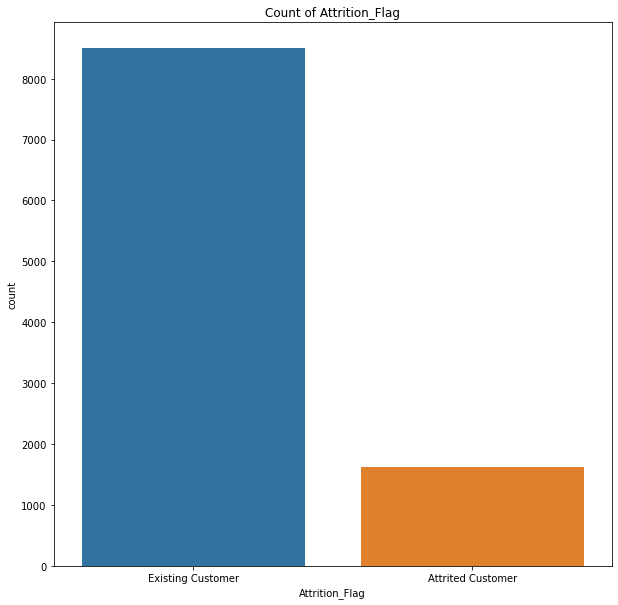

Categorical Variable: Gender


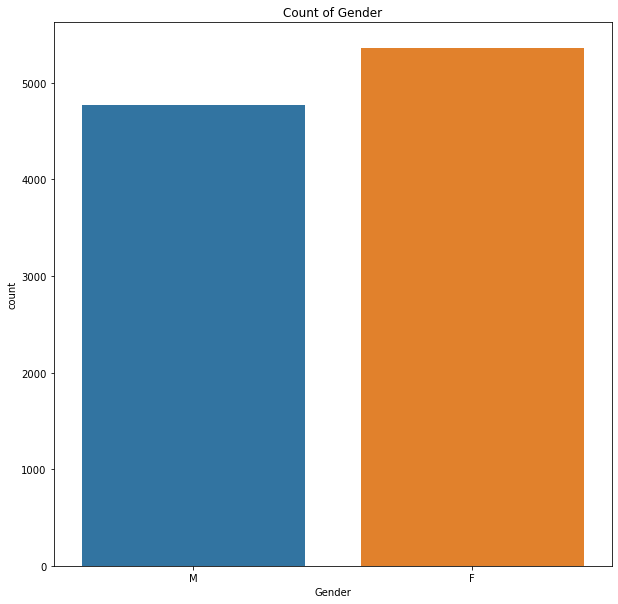

Categorical Variable: Education_Level


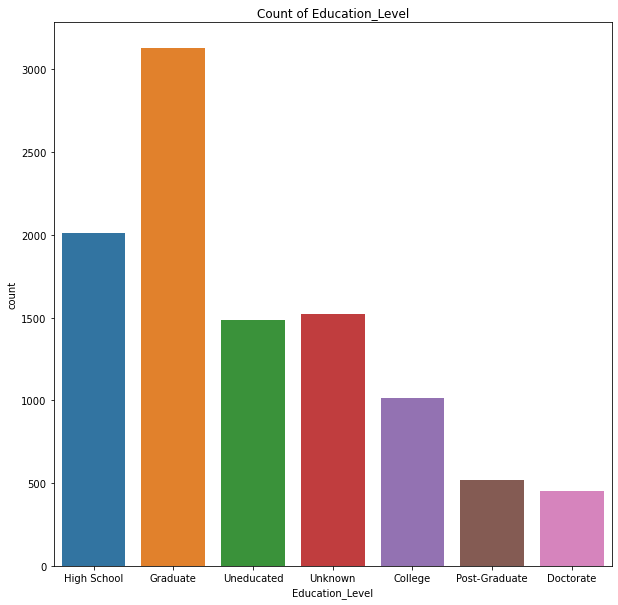

Categorical Variable: Marital_Status


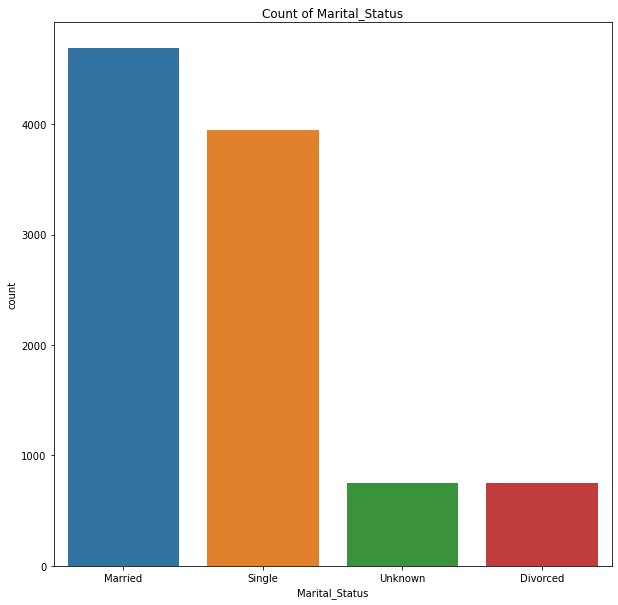

Categorical Variable: Income_Category


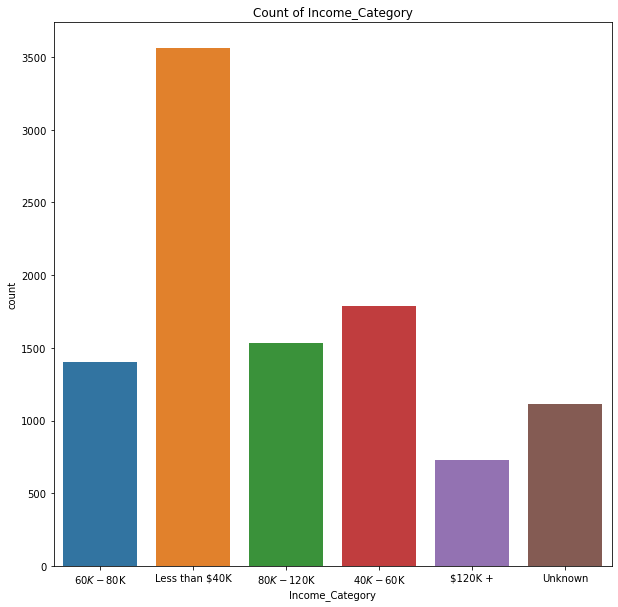

Categorical Variable: Card_Category


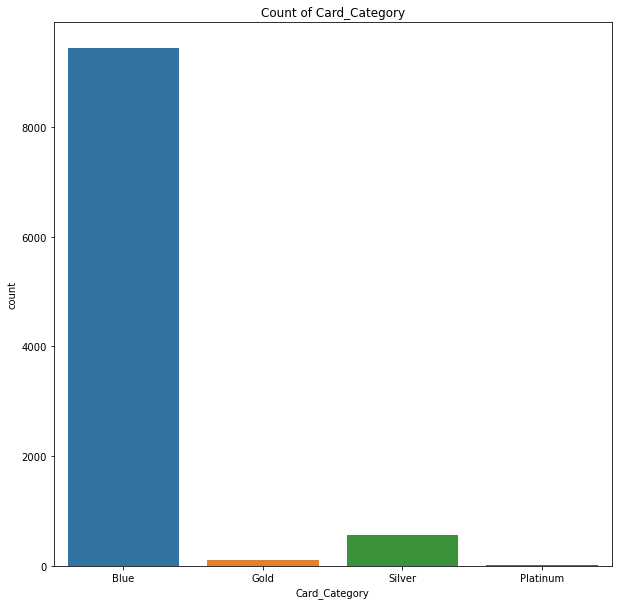

In [11]:
for variable in cat_variables:
    cat_plots(variable)

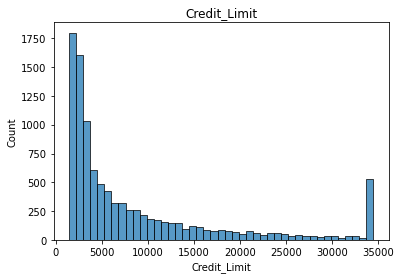

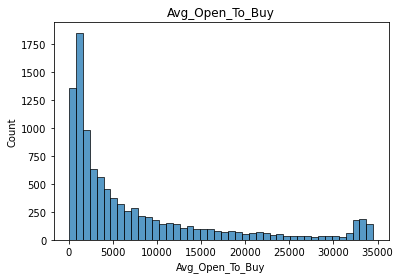

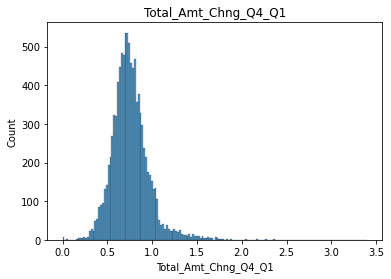

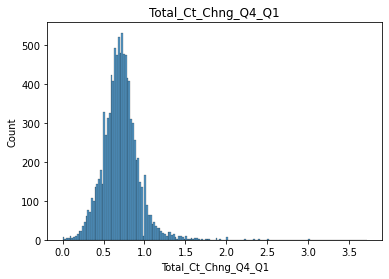

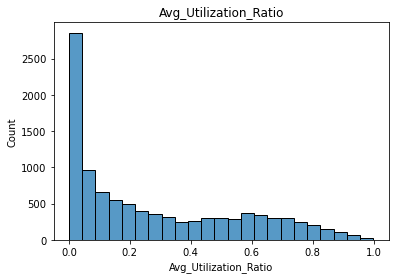

In [12]:
# Plotting countinous variables
continous_variables = data.select_dtypes(['float64']).columns.to_list()

for cont_variable in continous_variables: 
    plt.figure()
    plt.title(cont_variable)
    ax = sns.histplot(data[cont_variable])

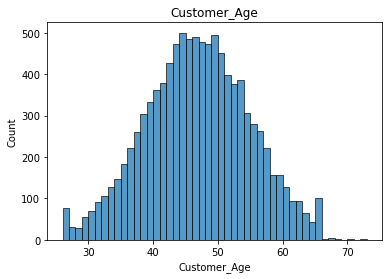

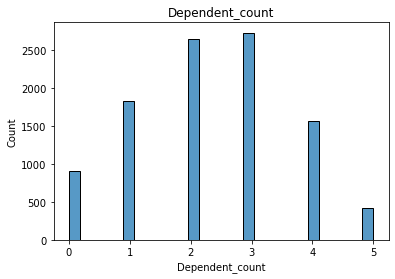

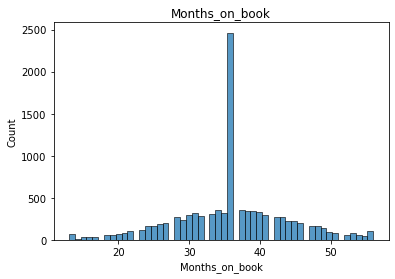

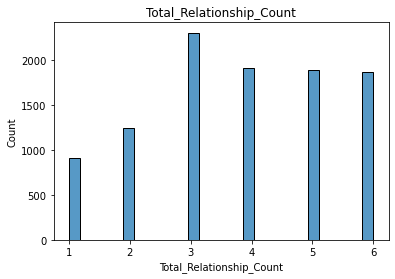

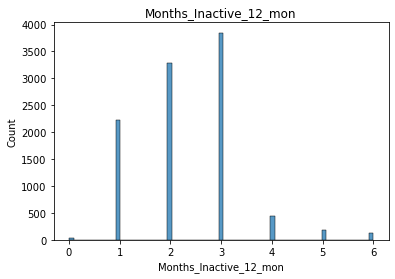

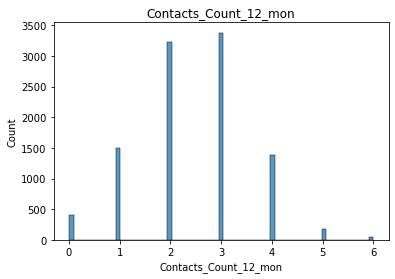

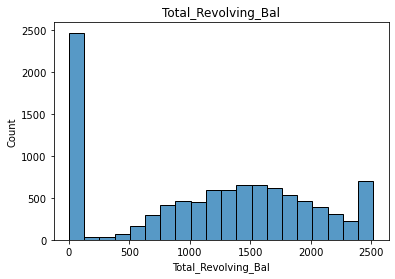

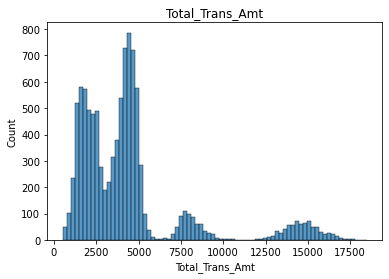

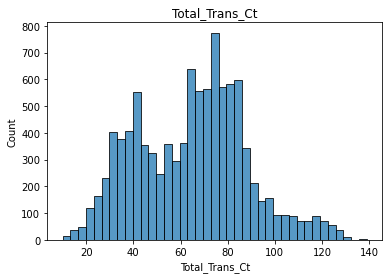

In [13]:
# Plotting discrete variables
discrete_variables = data.select_dtypes(['int64']).columns.to_list()

for disc_variable in discrete_variables: 
    plt.figure()
    plt.title(disc_variable)
    ax = sns.histplot(data[disc_variable],kde = False)

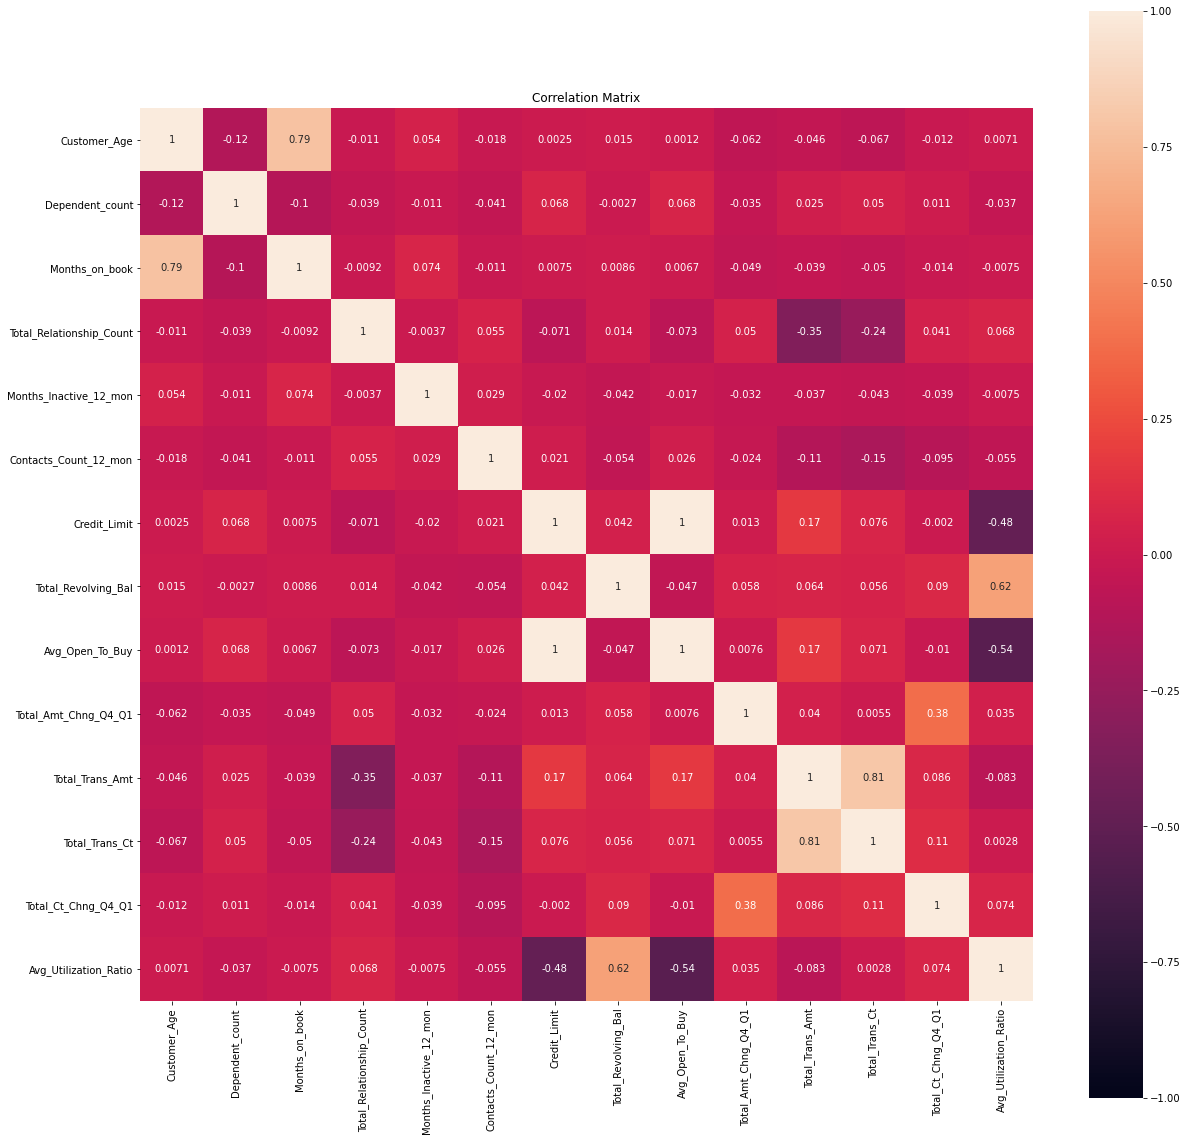

In [14]:
# Correlation matrix plot
data_corr = data.select_dtypes(exclude = 'object')
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=data_corr.corr(), annot=True, square=True,vmin=-1, vmax=1, ax=ax)
plt.title('Correlation Matrix')
plt.show()

<a id = 'feature-engineering'></a>
# Feature Engineering

In [15]:
df = data.copy()
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<a id = 'label-encoding'></a>
## Label Encoding

In [16]:
# Label Encoding of ordinal categorical variables
Income_Category_map = {
    'Unknown'        : 0,
    'Less than $40K' : 1,
    '$40K - $60K'    : 2,
    '$60K - $80K'    : 3,
    '$80K - $120K'   : 4,
    '$120K +'        : 5
}


Card_Category_map = {
    'Blue'     : 0,
    'Silver'   : 1,
    'Gold'     : 2,
    'Platinum' : 3
}

Education_Level_map = {
    'Unknown'       : 0,
    'Uneducated'    : 1,
    'High School'   : 2,
    'College'       : 3,
    'Graduate'      : 4,
    'Post-Graduate' : 5,
    'Doctorate'     : 6
}

df['Income_Category'] = df['Income_Category'].map(Income_Category_map)
df['Card_Category'] = df['Card_Category'].map(Card_Category_map)
df['Education_Level'] = df['Education_Level'].map(Education_Level_map)

In [17]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,2,Married,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,4,Single,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,4,Married,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,2,Unknown,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,1,Married,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [18]:
# Target Variable
y = df['Attrition_Flag']
y = y.map({'Existing Customer':0, 'Attrited Customer':1})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [19]:
df.drop(columns = ['Attrition_Flag'],inplace = True)
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,2,Married,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,4,Single,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,4,Married,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,2,Unknown,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,1,Married,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [20]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [21]:
# Encoding Gender and MArtial_Status
df['Gender'] = df['Gender'].map({'M':0,'F':1})
dummies = pd.get_dummies(df[['Marital_Status']])
df= pd.concat([df,dummies], axis=1)
df.drop(columns = ['Marital_Status'],inplace = True)

In [22]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,0,3,2,3,0,39,5,1,3,...,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0
1,49,1,5,4,1,0,44,6,1,2,...,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0
2,51,0,3,4,4,0,36,4,1,0,...,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0
3,40,1,4,2,1,0,34,3,4,1,...,796.0,1.405,1171,20,2.333,0.760,0,0,0,1
4,40,0,3,1,3,0,21,5,1,0,...,4716.0,2.175,816,28,2.500,0.000,0,1,0,0


In [23]:
df.drop(columns = ['Marital_Status_Unknown'],inplace = True)

In [24]:
df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,45,0,3,2,3,0,39,5,1,3,...,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0
1,49,1,5,4,1,0,44,6,1,2,...,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1
2,51,0,3,4,4,0,36,4,1,0,...,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0
3,40,1,4,2,1,0,34,3,4,1,...,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0
4,40,0,3,1,3,0,21,5,1,0,...,0,4716.0,2.175,816,28,2.500,0.000,0,1,0


<a id = 'imbalance'></a>
## Addressing the imbalance issue

In [25]:
# Adressing the imbalance issue by SMOTE
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=10)

X_sm, y_sm = sm.fit_resample(df, y)

In [27]:
print('Before Smoting:')
print(y.value_counts())
print('After Smoting:')
print(y_sm.value_counts())

Before Smoting:
0    8500
1    1627
Name: Attrition_Flag, dtype: int64
After Smoting:
1    8500
0    8500
Name: Attrition_Flag, dtype: int64


<a id = 'train-test-split'></a>
## Train Test Split

In [28]:
# Importing the library
from sklearn.model_selection import train_test_split
# Splitting into train test stratified split with a ratio of 80:20
X_train,X_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state = 0, shuffle= True,stratify = y_sm)

print(y_train.value_counts())
print(y_test.value_counts())

1    6800
0    6800
Name: Attrition_Flag, dtype: int64
1    1700
0    1700
Name: Attrition_Flag, dtype: int64


<a id = 'data-modeling'></a>
# Data Modeling

In [29]:
# Importing modeling libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, classification_report

In [30]:
# Creating a function for generating the model report.
def model_report(ml_algorithm):
    model = ml_algorithm.fit(X_train, y_train)
    model_acc = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    recall = recall_score(y_true=y_test, y_pred=y_pred)
    precision = precision_score(y_true=y_test, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    print(f'Model: {ml_algorithm.__class__.__name__}')
    print('-'*50)
    print(f'Model Accuracy: {model_acc:.4f}, Testing Accuracy: {test_acc:.4f}')
    print(f'Recall: {recall:.4f}, Precision: {precision:.4f}, MSE: {mse:.4f}')
    print('-'*50)
    
    plot_confusion_matrix(model, X_test, y_test,
                         display_labels=model.classes_,
                         normalize='true',
                         cmap=plt.cm.Blues)
    plt.title(f'{ml_algorithm.__class__.__name__} normalied confusion matrix')
    plt.show()
    
    print(classification_report(y_test, y_pred))
    print('-'*50)

<a id = 'random-forest'></a>
## Random Forest Classifier

Model: RandomForestClassifier
--------------------------------------------------
Model Accuracy: 1.0000, Testing Accuracy: 0.9829
Recall: 0.9859, Precision: 0.9801, MSE: 0.0171
--------------------------------------------------


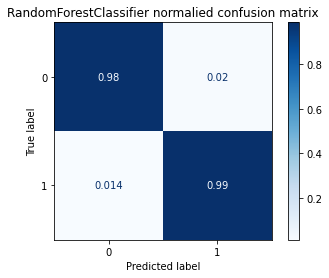

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1700
           1       0.98      0.99      0.98      1700

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400

--------------------------------------------------


In [32]:
rcf = RandomForestClassifier(random_state = 1)
#Generating the model report for random forest classifier.
model_report(rcf)

<a id = 'xgboost'></a>
## XGBoost Classifier

C:\Users\sam11\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:31:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model: XGBClassifier
--------------------------------------------------
Model Accuracy: 0.9999, Testing Accuracy: 0.9876
Recall: 0.9906, Precision: 0.9848, MSE: 0.0124
--------------------------------------------------


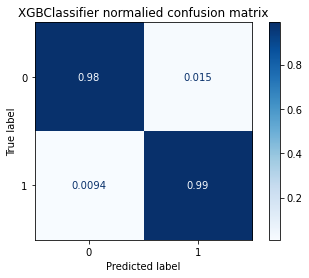

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1700
           1       0.98      0.99      0.99      1700

    accuracy                           0.99      3400
   macro avg       0.99      0.99      0.99      3400
weighted avg       0.99      0.99      0.99      3400

--------------------------------------------------


In [33]:
xgb = XGBClassifier()
#Generating the model report for xgboost classifier
model_report(xgb)

We got a good model with accuracy of **98.76%** and recall of **99.06%**. Hence this can be considered as a good model and can be used for prediction.

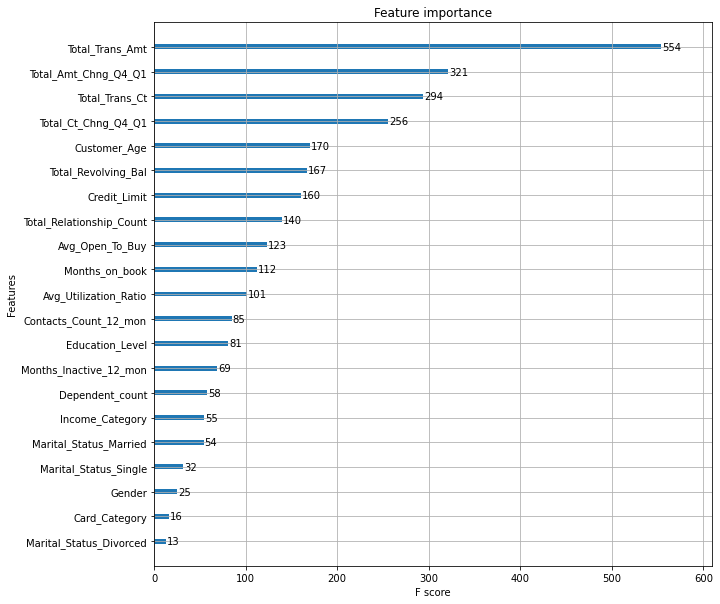

In [34]:
# Plotting feature importance
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgb,ax=ax)
plt.show()

<a id = 'testing-the-model'></a>
# Testing the model

In [55]:
# Testing the model for 10 times
for i in range(1,11):
    result = xgb.predict(X_test.sample())
    if result==0:
        print('The Customer will not Churn')
    else:
        print('The Customer will Churn')

The Customer will Churn
The Customer will Churn
The Customer will not Churn
The Customer will Churn
The Customer will Churn
The Customer will not Churn
The Customer will not Churn
The Customer will not Churn
The Customer will not Churn
The Customer will not Churn
